# Employment rate and salary trends between 2013 - 2017 for Accountancy and Business Graduates

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Purpose-of-this-exercise" data-toc-modified-id="Purpose-of-this-exercise-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Purpose of this exercise</a></span></li><li><span><a href="#Quick-Summary:" data-toc-modified-id="Quick-Summary:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Quick Summary:</a></span></li><li><span><a href="#Load-all-relevant-data" data-toc-modified-id="Load-all-relevant-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load all relevant data</a></span><ul class="toc-item"><li><span><a href="#Load-dataset-and-metadata" data-toc-modified-id="Load-dataset-and-metadata-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load dataset and metadata</a></span></li></ul></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#The-reason-why-I-choose-not-to-compare-between-universities-is-due-to-a-couple-of-issues." data-toc-modified-id="The-reason-why-I-choose-not-to-compare-between-universities-is-due-to-a-couple-of-issues.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>The reason why I choose not to compare between universities is due to a couple of issues.</a></span><ul class="toc-item"><li><span><a href="#Proof-as-to-why-we-cannot-simply-take-the-mean-salary-of-hons-and-no-hons-to-be-the-average-of-both" data-toc-modified-id="Proof-as-to-why-we-cannot-simply-take-the-mean-salary-of-hons-and-no-hons-to-be-the-average-of-both-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Proof as to why we cannot simply take the mean salary of hons and no hons to be the average of both</a></span></li></ul></li><li><span><a href="#While-the-analysis-is-fairly-simple,-it-has-revealed-some-very-interesting-insights-based-on-how-the-trends-have-moved-for-the-past-5-years-excluding-2018-which-we-do-not-have." data-toc-modified-id="While-the-analysis-is-fairly-simple,-it-has-revealed-some-very-interesting-insights-based-on-how-the-trends-have-moved-for-the-past-5-years-excluding-2018-which-we-do-not-have.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>While the analysis is fairly simple, it has revealed some very interesting insights based on how the trends have moved for the past 5 years excluding 2018 which we do not have.</a></span></li></ul></div>

## Purpose of this exercise

The purpose of this exercise is to analyse how employment rate and average salaries have changed over time in the last 5 years except 2018. The idea here is to help students that are entering universities to make a more informed decision on which unversity (NTU, NUS, SMU) and which degree (Accountancy vs Business) by providing them with the prospect of each degree from the get go.

The visualisation I have in mind is fairly simple and that is to plot out the time series for employment rate and salary at a university level separated into Accountancy and Business

One thing to note is that the dataset is not limited to just Accountancy and Business degrees, there are in fact many other degrees. However, I am analysing only the Accountancy and Business degrees as a proof of concept. The code can be replicated to analyse other degrees with some slight changes as well (mainly naming convention and function). Moreover, as a business undergraduate myself, I am interested to understand what would the prospect be upon my graduation.

## Quick Summary:

Accountancy degree is a much safer option in terms of employability as compared to a Business degree (Although the employability of each major is unknown). Only about 5% ~ 10% of Accountancy graduates run risk of facing unemployment within the first 6 months of finishing their final examinations as compared to about 15% ~ 20% of the Business graduates.

However, Business graduates generally earn more. Hence, if one's goal is to start with a relatively higher pay, getting a Business degree is recommended since the pay for Accountancy fresh graduates have been rather stagnant.

Out of the three universities, NUS Business degree has the highest median salary as compared to its counterparts. Unfortunately, the salaries for the major within each Business degree is unknown.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load all relevant data

Data source: https://data.gov.sg/dataset/graduate-employment-survey-ntu-nus-sit-smu-sutd

### Load dataset and metadata

In [2]:
# Enter your own path if necessary
df = pd.read_csv('survey.csv', sep = ';')
df.head()

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816


In [3]:
# Enter your own path where you saved your metadata-survey.txt
f = open("metadata-survey.txt", "r", encoding = 'UTF-8')
print(f.read())

# Metadata for Graduate Employment Survey - NTU, NUS, SIT, SMU & SUTD
---
Identifier: 'aa812691-df21-4c0a-b553-85336695f872'
Name: 'graduate-employment-survey-ntu-nus-sit-smu-sutd'
Title: 'Graduate Employment Survey - NTU, NUS, SIT, SMU & SUTD'
Description:
  - 'The Graduate Employment Survey (GES) is jointly conducted by NTU, NUS, SMU, SIT
    (from 2014) and SUTD (from 2015) annually to survey the employment conditions
    of graduates about six months after their final examinations.  The Ministry of
    Education (MOE) publishes the results of key employment indicators of the survey
    to provide prospective students with timely and comparable data to assist them
    in making informed course decisions.  Graduates from NTU, NUS and SMU were surveyed
    in Nov.  Due to their different academic calendars, graduates from SUTD and SIT
    were surveyed in Feb and Mar.'
  - ''
  - '2017 GES:'
  - ''
  - '*  6,042 full-time graduates and 30 follow-up graduates from NTU were surveyed
   

## Data preprocessing

In [4]:
# Check unique university names to ensure a given university is not spelled differently
df['university'].unique()

array(['Nanyang Technological University',
       'National University of Singapore',
       'Singapore Management University',
       'Singapore Institute of Technology',
       'Singapore University of Technology and Design'], dtype=object)

In [5]:
# Replace university names to their respective acronyms
df['university'] = df['university'].replace(['Nanyang Technological University',
       'National University of Singapore',
       'Singapore Management University',
       'Singapore Institute of Technology',
       'Singapore University of Technology and Design'], ['NTU', 'NUS', 'SMU', 'SIT', 'SUTD'])

# Check to ensure the result 
df['university'].unique()

array(['NTU', 'NUS', 'SMU', 'SIT', 'SUTD'], dtype=object)

In [6]:
# While it may seem like there are no cases of NA. That might be misleading as NA is currently recognised as string.
# Looking at the metedata, it is stated that data that are not available or not applicable are stored as 'na'
# This means that we can get python to identify 'na' as NA before deciding how to treat it
print(df.info())

# Convert 'na' to NaN
df = df.replace('na', np.nan)

# Notice the change in the number of non-null object. This means that na is now recognised
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 12 columns):
year                         570 non-null int64
university                   570 non-null object
school                       570 non-null object
degree                       570 non-null object
employment_rate_overall      570 non-null object
employment_rate_ft_perm      570 non-null object
basic_monthly_mean           570 non-null object
basic_monthly_median         570 non-null object
gross_monthly_mean           570 non-null object
gross_monthly_median         570 non-null object
gross_mthly_25_percentile    570 non-null object
gross_mthly_75_percentile    570 non-null object
dtypes: int64(1), object(11)
memory usage: 53.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 12 columns):
year                         570 non-null int64
university                   570 non-null object
school                       558 non-null object


In [7]:
# It can be seen that if employment_rate_overall is NaN, the remaining features would be blank as well.
# This makes sense because every column after employment_rate_overall is dependent on whether if there is any employment

df[df['employment_rate_overall'].isnull() == True]

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
24,2013,NTU,College of Sciences,Biomedical Sciences **,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2013,NTU,College of Sciences,Mathematics & Economics **,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,2013,NUS,School of Computing,Bachelor of Computing (Computational Biology) **,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,2013,NUS,School of Computing,Bachelor of Computing (Computer Engineering) **,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,2013,NUS,School of Design & Environment,Bachelor of Arts (Architecture) ** ##,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,2013,NUS,Yong Siew Toh Conservatory of Music,Bachelor of Music **,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,2013,NUS,Faculty of Science,Bachelor of Applied Science **,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,2013,NUS,Faculty of Science,Bachelor of Science (Computational Biology) **,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,2014,NTU,College of Sciences,Biomedical Science **,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,2014,NUS,School of Computing,Bachelor of Computing (Computational Biology) **,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Remove rows where employment_rate_overall is NaN since those rows are irrelevant
df = df[df['employment_rate_overall'].isnull() == False]

# Check to see if NaN rows has been successfully removed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 568
Data columns (total 12 columns):
year                         513 non-null int64
university                   513 non-null object
school                       504 non-null object
degree                       513 non-null object
employment_rate_overall      513 non-null object
employment_rate_ft_perm      513 non-null object
basic_monthly_mean           513 non-null object
basic_monthly_median         513 non-null object
gross_monthly_mean           513 non-null object
gross_monthly_median         513 non-null object
gross_mthly_25_percentile    513 non-null object
gross_mthly_75_percentile    513 non-null object
dtypes: int64(1), object(11)
memory usage: 52.1+ KB


In [9]:
# We do not have to remove NaN from school as they are all belonged to SUTD. NaN in this case simply suggest a lack of a suitable school name.
# For this exercise, I did not include SUTD as the university does not have Accountancy and Business
# However, for readers who wish to take my code and analyse the bachelor of engineering, you will have to rename NaN as school of engineering perhaps

df[df['university'] == 'SUTD']

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
285,2015,SUTD,NaN,Bachelor of Engineering (Engineering Product D...,92.5,88.1,3595,3618,3565,3600,3400,3800
286,2015,SUTD,NaN,Bachelor of Engineering (Engineering Systems a...,80.3,71.8,3699,3450,3763,3500,3190,4100
287,2015,SUTD,NaN,Bachelor of Engineering (Information Systems T...,86,83.7,3872,3700,3952,3950,3338,4450
434,2016,SUTD,NaN,Bachelor of Engineering (Engineering Product D...,87,79.7,3620,3500,3690,3600,3300,3750
435,2016,SUTD,NaN,Bachelor of Engineering (Information Systems T...,91.9,91.9,4197,4000,4232,4000,3500,4950
436,2016,SUTD,NaN,Bachelor of Engineering (Engineering Systems a...,100,93.5,3695,3600,3830,3650,3550,4200
566,2017,SUTD,NaN,Bachelor of Engineering (Engineering Product D...,89.9,87.3,3594,3600,3638,3600,3450,3800
567,2017,SUTD,NaN,Bachelor of Engineering (Information Systems T...,100,100,4146,4000,4175,4023,3600,4900
568,2017,SUTD,NaN,Bachelor of Engineering (Engineering Systems a...,91.7,85.4,3856,3800,3956,3850,3600,4210


In [11]:
# Convert variable types 
df[['employment_rate_overall', 'employment_rate_ft_perm']] = df[['employment_rate_overall', 'employment_rate_ft_perm']].astype(float)

# Might consider using a loop to convert to the code shorter
df[['basic_monthly_mean', 'basic_monthly_median', 
    'gross_monthly_mean', 'gross_monthly_median', 
    'gross_mthly_25_percentile', 
    'gross_mthly_75_percentile']] = df[['basic_monthly_mean', 'basic_monthly_median', 
                                        'gross_monthly_mean', 'gross_monthly_median',
                                        'gross_mthly_25_percentile', 'gross_mthly_75_percentile']].astype('int64')

# Check to ensure the data types have been changed successfully 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 568
Data columns (total 12 columns):
year                         513 non-null int64
university                   513 non-null object
school                       513 non-null object
degree                       513 non-null object
employment_rate_overall      513 non-null float64
employment_rate_ft_perm      513 non-null float64
basic_monthly_mean           513 non-null int64
basic_monthly_median         513 non-null int64
gross_monthly_mean           513 non-null int64
gross_monthly_median         513 non-null int64
gross_mthly_25_percentile    513 non-null int64
gross_mthly_75_percentile    513 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 52.1+ KB


In [12]:
# A quick check of unique degree names to ensure no one degree is named differently. 
# Notice that for NTU, Accountancy (3-yr direct Honours Programme) is named differently from Bachelor of Accountancy (Hons)
# This means that we will need to deal with the different naming convention later

for uni in df['university'].unique():
    print(str(uni), df[df['university'] == uni].degree.unique(), "\n")

NTU ['Accountancy and Business' 'Accountancy (3-yr direct Honours Programme)'
 'Business (3-yr direct Honours Programme)' 'Business and Computing'
 'Aerospace Engineering' 'Bioengineering'
 'Chemical and Biomolecular Engineering' 'Computer Engineering'
 'Civil Engineering' 'Computer Science'
 'Electrical and Electronic Engineering' 'Environmental Engineering'
 'Information Engineering and Media' 'Materials Engineering'
 'Mechanical Engineering' 'Maritime Studies' 'Art, Design & Media'
 'Chinese' 'Communication Studies' 'Economics' 'English'
 'Linguistics and Multilingual Studies' 'Psychology' 'Sociology'
 'Biomedical Sciences (Traditional Chinese Medicine) ^'
 'Biological Sciences' 'Chemistry & Biological Chemistry'
 'Mathematical Science' 'Physics / Applied Physics'
 'Sports Science and Management' 'Science (with Education)'
 'Arts (with Education)'
 'Biomedical Science (Traditional Chinese Medicine) ^'
 'Mathematics & Economics' 'Chemical And Biomolecular Engineering'
 'Electrical An

SUTD ['Bachelor of Engineering (Engineering Product Development)'
 'Bachelor of Engineering (Engineering Systems and Design)'
 'Bachelor of Engineering (Information Systems Technology and Design)'] 



In [13]:
# We can use a dictionary, we can perform a check to see if a given business school 
# Notice that SMU is the only school that differentiates Business and Accountancy at a school level. This is ok as we are not combining Accountancy and Business

dict(zip(df['school'], df['university']))

{'College of Business (Nanyang Business School)': 'NTU',
 'College of Engineering': 'NTU',
 'College of Humanities, Arts & Social Sciences': 'NTU',
 'College of Sciences': 'NTU',
 'National Institute of Education (NIE)': 'NTU',
 'Faculty of Arts & Social Sciences': 'NUS',
 'NUS Business School': 'NUS',
 'School of Computing': 'NUS',
 'Faculty of Dentistry': 'NUS',
 'School of Design & Environment': 'NUS',
 'Faculty of Engineering': 'NUS',
 'Faculty of Law': 'NUS',
 'YLL School of Medicine': 'NUS',
 'Faculty of Science': 'NUS',
 'School of Accountancy (4-years programme) *': 'SMU',
 'School of Business (4-years programme) *': 'SMU',
 'School of Economics (4-years programme) *': 'SMU',
 'School of Information Systems (4-years programme) *': 'SMU',
 'School of Social Sciences (4-years programme) *': 'SMU',
 'School of Law (4-years programme) *': 'SMU',
 'School of Accountancy (4-year programme) *': 'SMU',
 'School of Business (4-year programme) *': 'SMU',
 'School of Economics (4-year pro

## The reason why I choose not to compare between universities is due to a couple of issues.

1) Insights are not meaningful. There is little takeaway in knowing how business schools as a whole performed in each university due to multiple variables (Explained below).

2) Granularity. Each business school in general can be split into Business and Accountancy. Business degree contains multiple majors ranging from HR, Marketing, Business Analytics (NTU), Banking & Finance etc which the dataset does not contain such level of information.

3) Single vs double degree. For this dataset, only NTU split between single and double degree. For SMU, double degree has been classified under as single degree using its first degree. While NUS and SIT only have single degree information. We can easily remove the double degree from NTU but not SMU as it has already been clubbed together. This makes the comparison inconsistent.

4) Honours. Most of the business degrees have direct honours with the exception of NUS. Again, using only direct honours would result in an inconsistent comparison. On the other hand, taking the mean of the two might be risky because we do not know the exact sample size for each group (See proof below). 

5) SIT. SIT business degree is specific to hospitality. NTU for example, do not have such a major. Comparing at university level would mean that we are comparing the employment rates and salary of different majors which is an apple to orange comparison.

### Proof as to why we cannot simply take the mean salary of hons and no hons to be the average of both

In [14]:
# Proof of how mean cannot be used if sample size is unknown

# Assume equal sample size for both hons and non-hons
df_proof_equal = pd.DataFrame({'Honors': ['Non-Hons', 'Hons'],
                         'Sample_size': [100, 100],
                         'Employment_rate': [0.7, 0.8],
                         'Mean_salary': [3200, 3500]})

df_proof_equal

mean_employment_rate_equal = (0.7 + 0.8) / 2 # This is the same as (100*0.7 + 100 * 0.8)/(100+100)

# However, it is possible that the sample size is not equal.
df_proof_unequal = pd.DataFrame({'Honors': ['Non-Hons', 'Hons'],
                         'Sample_size': [100, 250], # 2.5 times is just an arbitrary number. Hons is certainly more than non-hons though
                         'Employment_rate': [0.7, 0.8],
                         'Mean_salary': [3200, 3500]})

mean_employment_rate_unequal = (0.7 + 0.8) / 2 # This is not the same as (100*0.7 + 250 * 0.8)/ (100+250)

# As there are more students for hons. It has a greater effect on the mean than non-hons.
print('mean_employment_rate_unequal:', str(mean_employment_rate_unequal))
print('Actual employment_rate:', str((100*0.7 + 250 * 0.8)/ (100+250)))

# As we only have information about the number of students surveyed but not the sample size for hons vs non-hons for NUS. 
# We cannot simply use the mean of the two groups 

mean_employment_rate_unequal: 0.75
Actual employment_rate: 0.7714285714285715


In [15]:
# Split dataset into university level df_'university' and subset out only business school, single degree, ensure consistent naming.

# NTU
df_ntu = df[(df['university'] == 'NTU') & (df['school'] == 'College of Business (Nanyang Business School)')]

# By removing the word 'and', we effectively removed all double degree information since the naming convention for double degree follows '1st degree and 2nd degree'
# ~ represents NOT 
df_ntu = df_ntu[~df_ntu['degree'].str.contains('and')]

# Rename older degrees to follow the current naming convention for ease of understanding
df_ntu.loc[df_ntu['degree'].str.contains('Accountancy'), ['degree']] = 'Bachelor of Accountancy (Hons)'

df_ntu.loc[df_ntu['degree'].str.contains('Business'), ['degree']] = 'Bachelor of Business (Hons)'

df_ntu

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
1,2013,NTU,College of Business (Nanyang Business School),Bachelor of Accountancy (Hons),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,NTU,College of Business (Nanyang Business School),Bachelor of Business (Hons),90.9,85.7,3053,3000,3214,3000,2700,3500
86,2014,NTU,College of Business (Nanyang Business School),Bachelor of Accountancy (Hons),96.6,96.1,2981,2800,3003,2840,2700,3000
87,2014,NTU,College of Business (Nanyang Business School),Bachelor of Business (Hons),89.6,80.2,3231,3000,3318,3100,2800,3600
195,2015,NTU,College of Business (Nanyang Business School),Bachelor of Accountancy (Hons),97.3,96.5,3182,2850,3240,2875,2850,3125
196,2015,NTU,College of Business (Nanyang Business School),Bachelor of Business (Hons),92.2,87.6,3343,3100,3502,3200,2900,3700
317,2016,NTU,College of Business (Nanyang Business School),Bachelor of Accountancy (Hons),97.3,95.1,3027,2900,3063,2900,2900,3100
319,2016,NTU,College of Business (Nanyang Business School),Bachelor of Business (Hons),89.6,77.1,3348,3200,3444,3300,3000,3800
438,2017,NTU,College of Business (Nanyang Business School),Bachelor of Accountancy (Hons),97.1,94.5,3121,3000,3166,3000,2900,3100
440,2017,NTU,College of Business (Nanyang Business School),Bachelor of Business (Hons),93.0,80.8,3530,3300,3643,3300,3000,3800


In [16]:
# NUS
# This dataset does not contain NUS double degree information. Hence, we simply need to subset business school
df_nus = df[(df['university'] == 'NUS') & (df['school'] == 'NUS Business School')]

df_nus

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
37,2013,NUS,NUS Business School,Bachelor of Business Administration,88.7,81.7,2960,2868,3062,3000,2700,3370
38,2013,NUS,NUS Business School,Bachelor of Business Administration (Hons),94.6,90.3,3404,3050,3512,3200,2800,3800
39,2013,NUS,NUS Business School,Bachelor of Business Administration (Accountancy),93.3,88.9,2740,2700,2922,2700,2700,3018
40,2013,NUS,NUS Business School,Bachelor of Business Administration (Accountan...,97.2,94.4,3065,2800,3143,2800,2700,3200
122,2014,NUS,NUS Business School,Bachelor of Business Administration,87.9,83.6,3234,3000,3367,3000,2800,3300
123,2014,NUS,NUS Business School,Bachelor of Business Administration (Hons),94.4,90.6,3979,3500,4090,3520,3200,4300
124,2014,NUS,NUS Business School,Bachelor of Business Administration (Accountancy),93.9,89.8,2836,2800,2989,2838,2700,3000
125,2014,NUS,NUS Business School,Bachelor of Business Administration (Accountan...,100.0,96.3,3350,2850,3407,2912,2800,3614
236,2015,NUS,NUS Business School,Bachelor of Business Administration,88.2,80.3,3164,3000,3341,3000,2800,3700
237,2015,NUS,NUS Business School,Bachelor of Business Administration (Hons),96.0,93.1,4173,3750,4326,3800,3300,4600


In [17]:
# SMU

# While, SMU classifies its Accountancy and Business degrees as different schools. It is ok because we are comparing internally
# As SMU has information on both the general cohort ie any award and also Cum Laude and above. We will keep both for the time being and observe the trend later
df_smu = df[df['university'] == 'SMU']

# Having a boolean inside the square bracket of a data frame enables Python to return all of the true cases
df_smu = df_smu[df_smu['school'].str.contains('Accountancy|Business')]

# Rename older degrees to follow the current naming convention for ease of understanding
# 2013 was (4-years programme) while 2014 was (4-year programme). Hence, need to change both years.

for i in df_smu['degree']:
    if 'Accountancy' in i.split() and 'Laude' in i.split():
        df_smu['degree'] = df_smu['degree'].replace(i, 'Accountancy Cum Laude and above')
    elif 'Business' in i.split() and 'Laude' in i.split():
        df_smu['degree'] = df_smu['degree'].replace(i, 'Business Management Cum Laude and above')        
    elif 'Accountancy' in i.split():
        df_smu['degree'] = df_smu['degree'].replace(i, 'Accountancy')
    elif 'Business' in i.split():
        df_smu['degree'] = df_smu['degree'].replace(i, 'Business Management')

df_smu

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
73,2013,SMU,School of Accountancy (4-years programme) *,Accountancy,94.2,93.2,3231,2800,3342,2825,2700,3430
74,2013,SMU,School of Accountancy (4-years programme) *,Accountancy Cum Laude and above,95.2,95.2,3580,2900,3634,3000,2700,3750
75,2013,SMU,School of Business (4-years programme) *,Business Management,93.2,87.3,3344,3000,3520,3200,2800,3750
76,2013,SMU,School of Business (4-years programme) *,Business Management Cum Laude and above,95.9,93.8,3825,3500,3975,3580,3000,4100
158,2014,SMU,School of Accountancy (4-year programme) *,Accountancy,93.6,91.4,3375,2850,3420,2875,2722,3614
159,2014,SMU,School of Accountancy (4-year programme) *,Accountancy Cum Laude and above,97.4,96.1,3871,3450,3903,3500,2875,4300
160,2014,SMU,School of Business (4-year programme) *,Business Management,90.9,86.4,3630,3250,3752,3333,3000,4000
161,2014,SMU,School of Business (4-year programme) *,Business Management Cum Laude and above,94.5,94.0,4019,3500,4116,3600,3200,4500
273,2015,SMU,School of Accountancy (4-year programme) *,Accountancy,97.3,93.0,3287,2900,3427,3000,2850,3500
274,2015,SMU,School of Accountancy (4-year programme) *,Accountancy Cum Laude and above,97.7,97.7,3597,3100,3701,3200,2850,4110


In [18]:
# SIT

# SIT only has one year of data for Accountancy and Business related degrees.
# Bachelor of Hospitality Business with Honours has fewer than 30 sample size (Check metadata) 
df_sit = df[(df['university'] == 'SIT') & (df['school'] == 'Singapore Institute of Technology')]
df_sit

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
564,2017,SIT,Singapore Institute of Technology,Bachelor of Accountancy with Honours,94.1,92.1,3073,3050,3113,3088,2975,3250
565,2017,SIT,Singapore Institute of Technology,Bachelor of Hospitality Business with Honours ^^^,94.7,84.2,2713,2700,2829,2800,2500,3100


In [19]:
# After ensure naming consistency, we will merge back the dataset of each school less SIT since it has only one year of data
# Due to the lack of data for SIT, I have decided to remove from the analysis 
df_comb = df_ntu.append([df_nus, df_smu])

In [20]:
# Create a generic function that can automatically generate emp rate plots for each university
# A_Hons and B_Hons represent Accountancy and Business with Honours respectively
# A_Cum Laude and B_Cum Laude represent Accountancy and Business with Cum Laude and above respectively (Exclusive to SMU)
# A and B could mean Accountancy and Business without Hons/ Cum Laude depending on the university

def gen_emp_rate(arr, unq_deg):
    for i in unq_deg:
        if '(Hons)' in i.split(): # NTU and NUS have (Hons) cases
            if '(Accountancy)' in i.split() or 'Accountancy' in i.split(): # NUS has bracket while NTU does not
                plt.plot(arr[arr['degree'] == i]['year'],
                         arr[arr['degree'] == i]['employment_rate_ft_perm'],
                         color = 'red', linestyle = '--', label = 'A_Hons')               
            elif 'Business' in i.split():
                plt.plot(arr[arr['degree'] == i]['year'],
                         arr[arr['degree'] == i]['employment_rate_ft_perm'],
                         color = 'blue', linestyle = '--', label = 'B_Hons')                
        elif 'Laude' in i.split(): # For SMU Cum Laude 
            if 'Accountancy' in i.split():
                plt.plot(arr[arr['degree'] == i]['year'],
                         arr[arr['degree'] == i]['employment_rate_ft_perm'],
                         color = 'red', linestyle = '--', label = 'A_Cum Laude')
            elif 'Business' in i.split():
                plt.plot(arr[arr['degree'] == i]['year'],
                         arr[arr['degree'] == i]['employment_rate_ft_perm'],
                         color = 'blue', linestyle = '--', label = 'B_Cum Laude')
        elif '(Accountancy)' in i.split() or 'Accountancy' in i.split(): # NUS Accountancy has bracket
            plt.plot(arr[arr['degree'] == i]['year'],
                     arr[arr['degree'] == i]['employment_rate_ft_perm'],
                     color = 'red', label = 'A')
        elif 'Business' in i.split(): # For NUS Business w/o (Hons) and SMU Business w/o Cum Laude 
            plt.plot(arr[arr['degree'] == i]['year'],
                     arr[arr['degree'] == i]['employment_rate_ft_perm'],
                     color = 'blue', label = 'B')
    plt.ylabel('employment_rate_ft_perm')
    plt.xlabel('year')
    plt.xticks(list(arr['year']))
    plt.title(str(uni) + ' Employment_rate between 2013 - 2017') # The for loop below ensures that the appropriate title gets called
    plt.legend()
    plt.show()

In [21]:
# Create a generic function that can automatically generate median salary plot for each university
# A_Hons and B_Hons represent Accountancy and Business with Honours respectively
# A_Cum Laude and B_Cum Laude represent Accountancy and Business with Cum Laude and above respectively (Exclusive to SMU)
# A and B could mean Accountancy and Business without Hons/ Cum Laude depending on the university

def gen_median_salary(arr, unq_deg):
    for i in unq_deg:
        if '(Hons)' in i.split(): # NTU and NUS have (Hons) cases
            if '(Accountancy)' in i.split() or 'Accountancy' in i.split(): # NUS has bracket while NTU does not
                plt.plot(arr[arr['degree'] == i]['year'],
                         arr[arr['degree'] == i]['basic_monthly_median'],
                         color = 'red', linestyle = '--', label = 'A_Hons')               
            elif 'Business' in i.split():
                plt.plot(arr[arr['degree'] == i]['year'],
                         arr[arr['degree'] == i]['basic_monthly_median'],
                         color = 'blue', linestyle = '--', label = 'B_Hons')                
        elif 'Laude' in i.split(): # For SMU Cum Laude 
            if 'Accountancy' in i.split():
                plt.plot(arr[arr['degree'] == i]['year'],
                         arr[arr['degree'] == i]['basic_monthly_median'],
                         color = 'red', linestyle = '--', label = 'A_Cum Laude')
            elif 'Business' in i.split():
                plt.plot(arr[arr['degree'] == i]['year'],
                         arr[arr['degree'] == i]['basic_monthly_median'],
                         color = 'blue', linestyle = '--', label = 'B_Cum Laude')
        elif '(Accountancy)' in i.split() or 'Accountancy' in i.split(): # NUS Accountancy has bracket
            plt.plot(arr[arr['degree'] == i]['year'],
                     arr[arr['degree'] == i]['basic_monthly_median'],
                     color = 'red', label = 'A')
        elif 'Business' in i.split(): # For NUS Business w/o (Hons) and SMU Business w/o Cum Laude 
            plt.plot(arr[arr['degree'] == i]['year'],
                     arr[arr['degree'] == i]['basic_monthly_median'],
                     color = 'blue', label = 'B')
    plt.ylabel('basic_monthly_median')
    plt.xlabel('year')
    plt.xticks(list(arr['year']))
    plt.title(str(uni) + ' basic_monthly_median salary between 2013 - 2017') # The for loop below ensures that the appropriate title gets called
    plt.legend()
    plt.show()

In [22]:
# Create a generic function that can automatically generate mean salary plot for each university
# A_Hons and B_Hons represent Accountancy and Business with Honours respectively
# A_Cum Laude and B_Cum Laude represent Accountancy and Business with Cum Laude and above respectively (Exclusive to SMU)
# A and B could mean Accountancy and Business without Hons/ Cum Laude depending on the university

def gen_mean_salary(arr, unq_deg):
    for i in unq_deg:
        if '(Hons)' in i.split(): # NTU and NUS have (Hons) cases
            if '(Accountancy)' in i.split() or 'Accountancy' in i.split(): # NUS has bracket while NTU does not
                plt.plot(arr[arr['degree'] == i]['year'],
                         arr[arr['degree'] == i]['basic_monthly_mean'],
                         color = 'red', linestyle = '--', label = 'A_Hons')               
            elif 'Business' in i.split():
                plt.plot(arr[arr['degree'] == i]['year'],
                         arr[arr['degree'] == i]['basic_monthly_mean'],
                         color = 'blue', linestyle = '--', label = 'B_Hons')                
        elif 'Laude' in i.split(): # For SMU Cum Laude 
            if 'Accountancy' in i.split():
                plt.plot(arr[arr['degree'] == i]['year'],
                         arr[arr['degree'] == i]['basic_monthly_mean'],
                         color = 'red', linestyle = '--', label = 'A_Cum Laude')
            elif 'Business' in i.split():
                plt.plot(arr[arr['degree'] == i]['year'],
                         arr[arr['degree'] == i]['basic_monthly_mean'],
                         color = 'blue', linestyle = '--', label = 'B_Cum Laude')
        elif '(Accountancy)' in i.split() or 'Accountancy' in i.split(): # NUS Accountancy has bracket
            plt.plot(arr[arr['degree'] == i]['year'],
                     arr[arr['degree'] == i]['basic_monthly_mean'],
                     color = 'red', label = 'A')
        elif 'Business' in i.split(): # For NUS Business w/o (Hons) and SMU Business w/o Cum Laude 
            plt.plot(arr[arr['degree'] == i]['year'],
                     arr[arr['degree'] == i]['basic_monthly_mean'],
                     color = 'blue', label = 'B')
    plt.ylabel('basic_monthly_mean')
    plt.xlabel('year')
    plt.xticks(list(arr['year']))
    plt.title(str(uni) + ' basic_monthly_mean salary between 2013 - 2017') # The for loop in the next cell ensures that the appropriate title gets called
    plt.legend()
    plt.show()

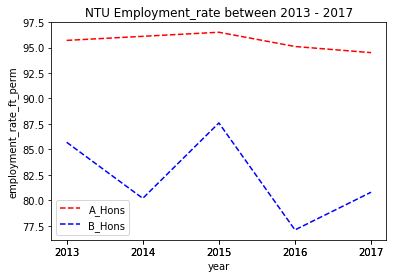

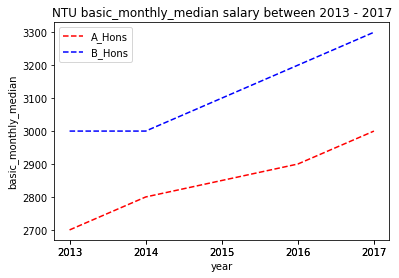

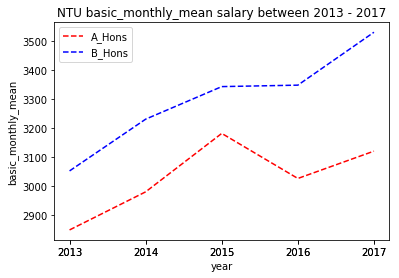

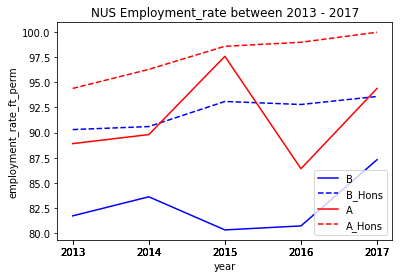

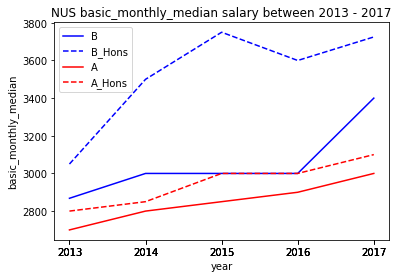

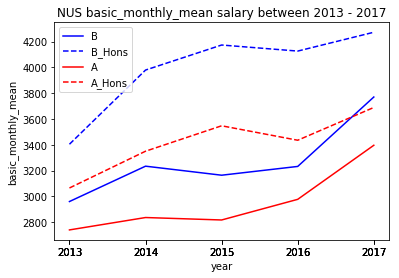

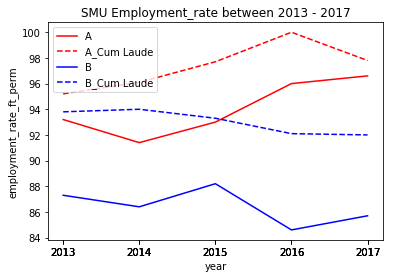

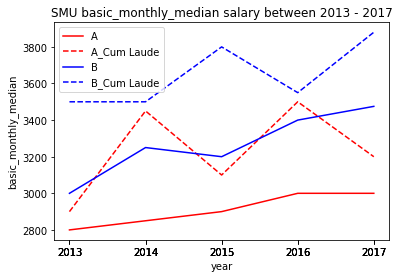

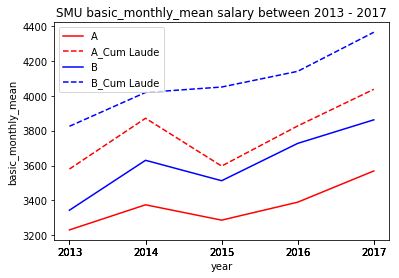

In [23]:
# Use a for loop to call all 3 plots for each university 

for uni in ['NTU', 'NUS', 'SMU']:
    arr = df_comb[df_comb['university'] == uni]
    unq_deg = list(arr['degree'].unique())
    gen_emp_rate(arr, unq_deg)
    gen_median_salary(arr, unq_deg)
    gen_mean_salary(arr, unq_deg)

## While the analysis is fairly simple, it has revealed some very interesting insights based on how the trends have moved for the past 5 years excluding 2018 which we do not have.

Insight 1) The employment rate for Accountancy graduates in each university have been consistently better than Business graduates. Could there be companies mass hiring Accountancy graduates upon their graduation? Perhaps, the big four (E&Y, Deloitte, PwC, KPMG)? Not to forget that majority of the Accountancy students would at least have interned at one of the big fours upon graduation

Insight 2) While more Accountancy graduates are getting employed, their starting salaries have been consistently lower than Business graduates. For NUS, it even reached a point where the median salary of Business graduates without Hons were the same as Accountancy graduates with Hons in 2015 and 2016

Insight 3) For the first time in 5 years, the employment rate for NTU Accountancy graduates have declined. Meanwhile, the employment rate for SMU Accountancy have shown signs of decline and slowing down. NUS however, is the only one where the emplyoment rate for its Accountancy graduates have been improving.

Insight 4) Out of the 3 universities and in terms of median salary, NTU Business graduates have been getting paid the least where the all time high was 3300 in 2017 as compared to 3400 and 3800 for SMU (w/o cum laude, 2017) and NUS (hons, 2015) respectively. SMU w/o cum laude include the entire cohort ie cum laude and below. However, we must not forget that SMU include double degree students as well.

Insight 5) The median salaries of Accountancy graduates regardless of universities have been very close (NTU_A_hons vs NUS_A_hons vs SMU_A). This could suggest that an average Accountancy graduates would find it hard to stand out. Accountancy graduates from SMU with Cum Laude were much more valued.

Insight 6) Fortunately for both Accountancy and Business graduates, their median salaries are expected to steadily increase in the near future